## Importing libraries and data

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import os

combined = pd.read_csv('combined.csv')
combined = combined[combined['sat_score'] > 0] # We drop where SAT scores = 0 since that throws off correlations

## Finding and plotting correlations between the overall SAT scores and the results of the survey of students, parents and teachers 

Text(0,0.5,'R Coefficient')

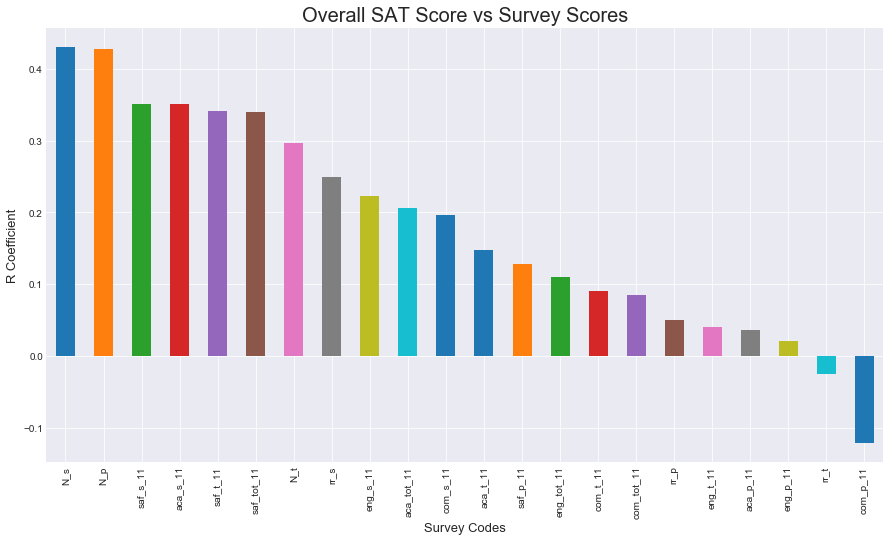

In [72]:
survey_cols = ["sat_score", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", 
        "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", 
        "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

combined_survey = combined[survey_cols]
corr = combined_survey.corr(method = 'pearson')
corr = corr['sat_score'][1:].sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (15,8))
ax = corr.plot.bar()
ax.set_title('Overall SAT Score vs Survey Scores', size = 20)
ax.set_xlabel('Survey Codes', size = 13)
ax.set_ylabel('R Coefficient', size = 13)

We find moderate positive correlations between N_s, N_p and N_t with overall SAT scores. These stand for number of student respondents, number of parent respondents and number of teacher respondents, respectively. At first, this seems to imply some sort of link where schools with higher number of pupils tend to do better in terms of SAT score.

We also find moderate links between having high saf_s_11, aca_s_11, saf_t_11, saf_tot_11 and high SAT scores. These stand for the safety/respect score based on student response, academic expectations based on student response, safety/respect score based on teacher response and safety and respect total score (combined).

## Plotting the relationship between safety/respect and SAT Scores

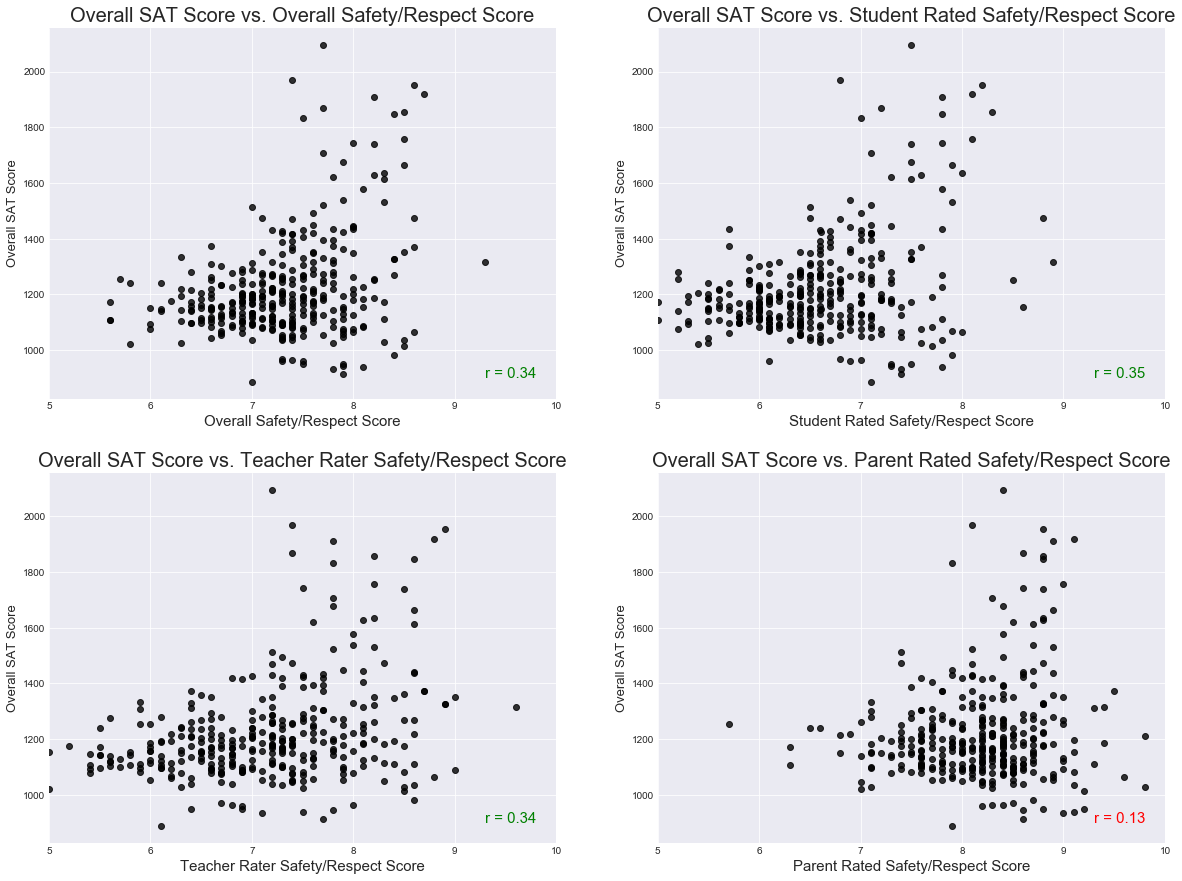

In [90]:
cols = ['sat_score', 'saf_tot_11','saf_s_11', 'saf_t_11', 'saf_p_11']
title = ['Overall Safety/Respect Score', 'Student Rated Safety/Respect Score',
        'Teacher Rater Safety/Respect Score', 'Parent Rated Safety/Respect Score']
coef = [round(corr[cols[idx+1]],2) for idx, value in enumerate(cols) if idx < len(cols)-1]

subset = combined[cols]

fig = plt.figure(figsize = (20,15))
for i in range(4):
    ax = fig.add_subplot(2,2, i+1)
    sns.regplot(x = subset[cols[i+1]], y = subset[cols[0]], color = 'black', fit_reg = False)
    sns.set_style('darkgrid')
    ax.set_xlim(5,10)
    ax.set_ylabel('Overall SAT Score', size = 13)
    if i == 0:
        ax.set_title('Overall SAT Score vs. ' + title[i], size = 20)
        ax.text(9.3, 900, 'r = '+ str(coef[i]), size = 15, color = 'green')
        ax.set_xlabel(title[i], size = 15)
    if i == 1:
        ax.set_title('Overall SAT Score vs. ' + title[i], size = 20)
        ax.text(9.3, 900, 'r = '+ str(coef[i]), size = 15, color = 'green')
        ax.set_xlabel(title[i], size = 15)
    if i == 2:
        ax.set_title('Overall SAT Score vs. ' + title[i], size = 20)
        ax.text(9.3, 900, 'r = '+ str(coef[i]), size = 15, color = 'green')
        ax.set_xlabel(title[i], size = 15)
    if i == 3:
        ax.set_title('Overall SAT Score vs. ' + title[i], size = 20)
        ax.text(9.3, 900, 'r = '+ str(coef[i]), size = 15, color = 'red')
        ax.set_xlabel(title[i], size = 15)

From visual inspection, it's clear that students report that they feel less safe and respected in schools compared to ratings by their teachers or their parents. There's a wide range in the way teachers seem to rate the safety/respect in their schools. Parents seem to think that the schools their children in are safer than the students themselves in general. 

Also, student and teacher ratings of safety/respect seem to moderately correlate with achievement on SATs. However, parental ratings are only weakly correlated. Perhaps this suggests that the way students feel in their own schools has more influence on how they perform than how parents perceive the safety/respect within their child's school.

## Plotting geographical average safety/respect per district in NYC

In [92]:
grouped = combined.groupby('school_dist')
subset = grouped.agg(np.mean) 
print(str(subset.shape[0]) + ' unique districts in NYC')

32 unique districts in NYC


C:\Users\yeachan153\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\yeachan153\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


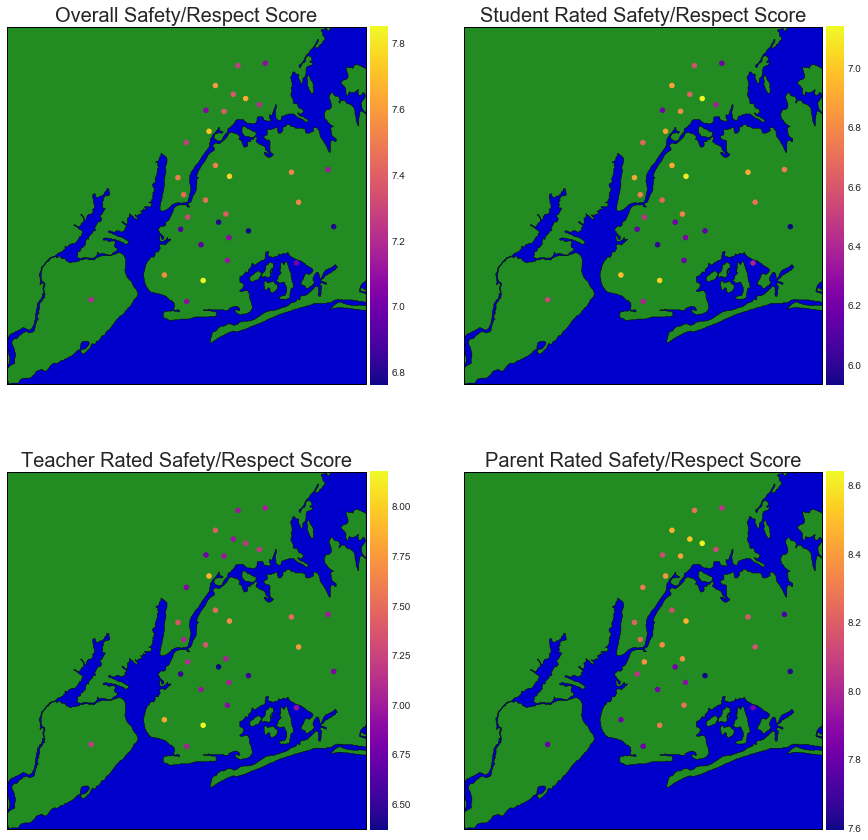

In [99]:
latitude = subset['lat'].tolist()
longitude = subset['lon'].tolist()

cols = ['saf_tot_11','saf_s_11', 'saf_t_11', 'saf_p_11']
title = ['Overall Safety/Respect Score', 'Student Rated Safety/Respect Score',
        'Teacher Rated Safety/Respect Score', 'Parent Rated Safety/Respect Score']

fig = plt.figure(figsize = (15,15))
for idx, current_col in enumerate(cols):
    ax = fig.add_subplot(2,2, idx + 1)
    m = Basemap(
        projection = 'merc',
        llcrnrlat = 40.496044,
        urcrnrlat = 40.915256,
        llcrnrlon = -74.255735,
        urcrnrlon = -73.700272,
        resolution = 'f'
        )
    m.drawmapboundary(fill_color = 'mediumblue')
    m.drawcoastlines(color = 'black', linewidth = .5)
    m.fillcontinents(color = 'forestgreen')
    m.scatter(x = longitude, y = latitude, zorder = 2, latlon = True, s = 20,
              c = subset[current_col], cmap = 'plasma')
    plt.colorbar(fraction=0.0472, pad=.01)
    if idx == 0:
        ax.set_title(title[idx], size = 20)
    if idx == 1:
        ax.set_title(title[idx], size = 20)
    if idx == 2:
        ax.set_title(title[idx], size = 20)
    if idx == 3:
        ax.set_title(title[idx], size = 20)

In the map, high scores indicate a higher rating of safety and respect by that group. Darker areas indicate areas that were marked as unsafe and lighter yellow colours indicate higher levels of subjective safety.

Students and teachers from South Brooklyn report feeling the safest. This does not match the expectations of parents, who seem to think the the Bronx area and the Manhattan area as well as the northern areas of Brooklyn are the safest. The central border area between Brooklyn and Queens seems to be rated as unsafe as a general consensus. The east Queen's area is also seen as unsafe by parents and to some degree by teachers and students.

## Investigating racial differences in SAT Scores

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]),
 <a list of 8 Text yticklabel objects>)

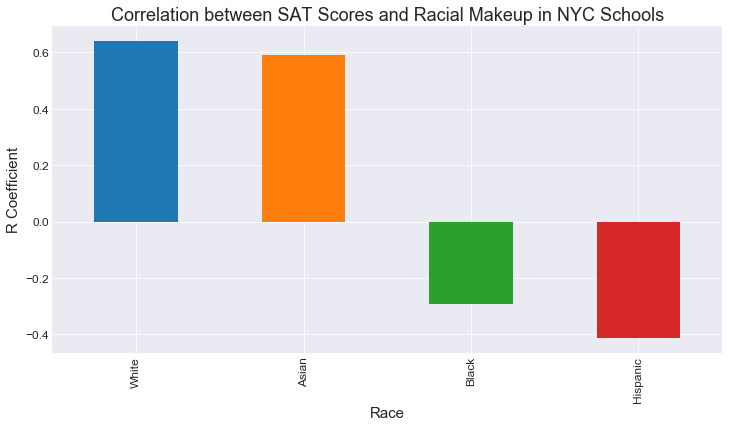

In [107]:
cols = ['sat_score','white_per', 'asian_per', 'black_per', 'hispanic_per']             
ticks = ['White', 'Asian', 'Black', 'Hispanic']
subset = combined[cols]             

corr = subset.corr(method = 'pearson') 
fig, ax = plt.subplots(figsize = (12,6))            
ax = corr['sat_score'][1:].plot.bar()
ax.set_title('Correlation between SAT Scores and Racial Makeup in NYC Schools', size = 18)
ax.set_ylabel('R Coefficient', size = 15)
ax.set_xlabel('Race', size = 15)
ax.set_xticklabels(ticks, size = 12)
plt.yticks(size = 12)

Students who study in schools where the majority of students are either white or asian seem to do well in their SATs. However, to a lesser degree, students who study in schools where the majority of students are either black or hispanic seem to do worse in their SATs